In [89]:
import matplotlib.pyplot as plt
import os
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
import glob as gb 
import cv2
import pandas as pd
import numpy as np 

In [90]:
trainpath='C:\\Users\\Abdelrahman Ahmed\\Data cnn1\\seg_train'
testpath="C:\\Users\\Abdelrahman Ahmed\\Data cnn1\\seg_test"
predpath="C:\\Users\\Abdelrahman Ahmed\\Data cnn1\\seg_pred"

In [91]:
total=0
lst=[]
for folder in os.listdir(trainpath):
  
  files=gb.glob(pathname=str(trainpath+"\\"+folder+"\\*jpg"))
  print(f"the foder train {folder} contains {len(files)} image")
  total+=len(files)
  lst.append(folder)
print("-------------------------------------")
print(f"the total number of train image is {total}")

the foder train buildings contains 2191 image
the foder train forest contains 2271 image
the foder train glacier contains 2404 image
the foder train mountain contains 2512 image
the foder train sea contains 2274 image
the foder train street contains 2382 image
-------------------------------------
the total number of train image is 14034


In [92]:
total=0
for folder in os.listdir(testpath):
  
  files=gb.glob(pathname=str(testpath+"\\"+folder+"\\*jpg"))
  print(f"the foder test {folder} contains {len(files)} image")
  total+=len(files)
print("-------------------------------------")
print(f"the total number of test image is {total}")

the foder test buildings contains 437 image
the foder test forest contains 474 image
the foder test glacier contains 553 image
the foder test mountain contains 525 image
the foder test sea contains 510 image
the foder test street contains 501 image
-------------------------------------
the total number of test image is 3000


In [93]:
files=gb.glob(pathname=str(predpath+"\\"+"\\*jpg"))
print(f"the foder pred contains {len(files)} image")

the foder pred contains 7301 image


In [94]:
code={'buildings':0, 'forest':1, 'glacier':2, 'mountain':3, 'sea':4, 'street':5}
def getcode(n):
  for x,y in code.items():
    if n==y:
      return x 


##**Image Size**

**for train**

In [95]:
size=[]
for folder in os.listdir(trainpath):
  files=gb.glob(pathname=str(trainpath+"\\"+folder+"\\*jpg"))
  for file in files:
    image=plt.imread(file)
    size.append(image.shape)
  
pd.Series(size).value_counts()




(150, 150, 3)    13986
(113, 150, 3)        7
(135, 150, 3)        3
(111, 150, 3)        3
(143, 150, 3)        2
(134, 150, 3)        2
(123, 150, 3)        2
(146, 150, 3)        2
(136, 150, 3)        2
(144, 150, 3)        2
(142, 150, 3)        2
(108, 150, 3)        2
(97, 150, 3)         1
(115, 150, 3)        1
(124, 150, 3)        1
(140, 150, 3)        1
(141, 150, 3)        1
(149, 150, 3)        1
(81, 150, 3)         1
(103, 150, 3)        1
(131, 150, 3)        1
(76, 150, 3)         1
(100, 150, 3)        1
(120, 150, 3)        1
(145, 150, 3)        1
(102, 150, 3)        1
(119, 150, 3)        1
(147, 150, 3)        1
(105, 150, 3)        1
(133, 150, 3)        1
(110, 150, 3)        1
dtype: int64

**for test**

In [96]:
size=[]
for folder in os.listdir(testpath):
  files=gb.glob(pathname=str(testpath+"\\"+folder+"\\*jpg"))
  for file in files:
    image=plt.imread(file)
    size.append(image.shape)
  
pd.Series(size).value_counts()




(150, 150, 3)    2993
(81, 150, 3)        1
(76, 150, 3)        1
(72, 150, 3)        1
(131, 150, 3)       1
(149, 150, 3)       1
(110, 150, 3)       1
(141, 150, 3)       1
dtype: int64

**for pred**

In [97]:
size=[]
files=gb.glob(pathname=str(predpath+"\\"+"\\*jpg"))
for file in files:
    image=plt.imread(file)
    size.append(image.shape)
  
pd.Series(size).value_counts()

(150, 150, 3)    7288
(108, 150, 3)       1
(133, 150, 3)       1
(131, 150, 3)       1
(144, 150, 3)       1
(149, 150, 3)       1
(124, 150, 3)       1
(143, 150, 3)       1
(374, 500, 3)       1
(126, 150, 3)       1
(139, 150, 3)       1
(129, 150, 3)       1
(112, 150, 3)       1
(100, 150, 3)       1
dtype: int64

## **Resize Image**

In [98]:
s=100

In [99]:
x_train=[]
y_train=[]
for folder in os.listdir(trainpath):
  files=gb.glob(pathname=str(trainpath+"\\"+folder+"\\*jpg"))
  for file in files:
    image=cv2.imread(file)
    image_array=cv2.resize(image,(s,s))
    x_train.append(image_array)
    y_train.append(code[folder])

In [100]:
x_test=[]
y_test=[]
for folder in os.listdir(testpath):
  files=gb.glob(pathname=str(testpath+"\\"+folder+"\\*jpg"))
  for file in files:
    image=cv2.imread(file)
    image_array=cv2.resize(image,(s,s))
    x_test.append(image_array)
    y_test.append(code[folder])

In [101]:
x_pred=[]
files=gb.glob(pathname=str(predpath+"\\"+"\\*jpg"))
for file in files:
    image=cv2.imread(file)
    image_array=cv2.resize(image,(s,s))
    x_pred.append(image_array)



##**Image View**

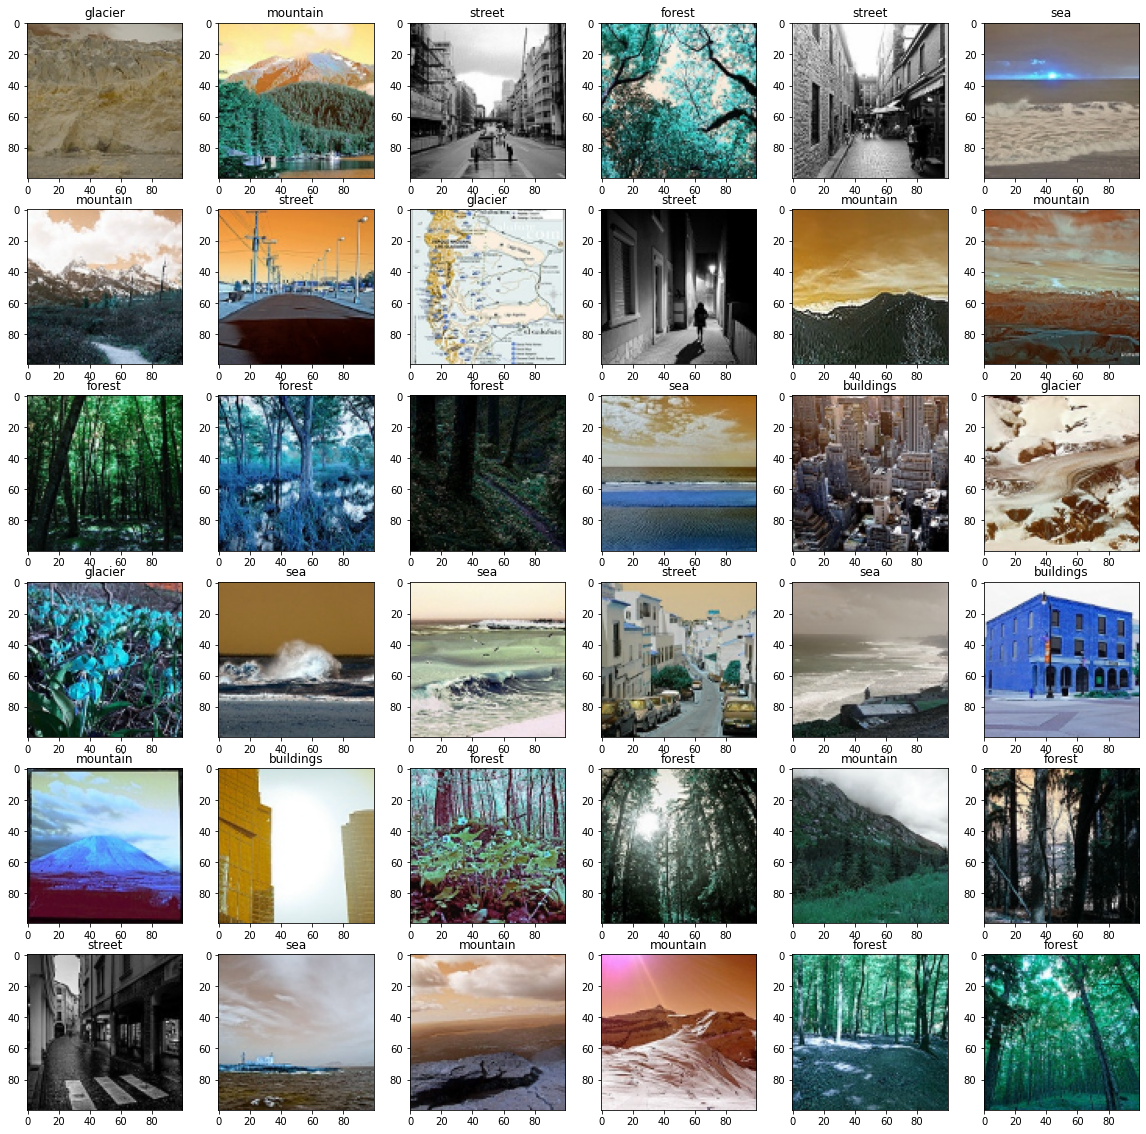

In [102]:
plt.figure(figsize=(20,20))
for n,i in enumerate(list(np.random.randint(0,len(x_train),36))):
  plt.subplot(6,6,n+1)
  plt.imshow(x_train[i])
  plt.title(getcode(y_train[i]))



##Transfer Data to Array

In [103]:
x_train=np.array(x_train)
y_train=np.array(y_train)
x_test=np.array(x_test)
y_test=np.array(y_test)
x_pred=np.array(x_pred)

In [104]:
x_train.shape

(14034, 100, 100, 3)

In [105]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout

In [106]:
KerasModel = Sequential([Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(s,s,3)),
        Conv2D(150,kernel_size=(3,3),activation='relu'),
        MaxPool2D(4,4),
        Conv2D(120,kernel_size=(3,3),activation='relu'),    
        Conv2D(80,kernel_size=(3,3),activation='relu'),    
        Conv2D(50,kernel_size=(3,3),activation='relu'),
        MaxPool2D(4,4),
        Flatten(),    
        Dense(128,activation='relu') ,
        Dense(64,activation='relu') ,    
        Dense(32,activation='relu') ,        
        Dropout(rate=0.5) ,            
        Dense(6,activation='softmax') ,    
        ])

In [107]:
KerasModel.compile(optimizer=tf.optimizers.Adam(),loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [110]:
KerasModel.fit(x_train,y_train,epochs=1,batch_size=64,verbose=1)

In [111]:
test_predictions=KerasModel.predict(y_test)
